# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
df=pd.read_csv(r'C:\Users\USER\ML Notebooks\final projects\ocean salinity\ocean.csv')

# Exploratory Data Analysis

In [3]:
#creating the simple report quickly
profile= ProfileReport(df,title='Pandas Profiling Report',explorative=True)

In [4]:
profile.to_widgets()

In [6]:
profile.to_file('output.html')

# Data Preprocessing

In [7]:
df.drop('Depth_ID',axis=1,inplace=True) #unnecessary for the prediction

In [8]:
for i in df[df.columns]:
    print(i, ':' ,df[i].isnull().sum()/len(df)*100,'% missing')  #checking the mising percentage of each features

Cst_Cnt : 0.0 % missing
Btl_Cnt : 0.0 % missing
Sta_ID : 0.0 % missing
Depthm : 0.0 % missing
T_degC : 1.2675996082616552 % missing
Salnty : 5.475318056154559 % missing
O2ml_L : 19.501585800294382 % missing
STheta : 6.092178761260454 % missing
O2Sat : 23.54002888318728 % missing
Oxy_µmol/Kg : 23.54072263468318 % missing
BtlNum : 86.27909853930622 % missing
RecInd : 0.0 % missing
T_prec : 1.2675996082616552 % missing
T_qual : 97.32593485904704 % missing
S_prec : 5.475318056154559 % missing
S_qual : 91.33805007267047 % missing
P_qual : 22.096910146462502 % missing
O_qual : 78.64679145714408 % missing
SThtaq : 92.3891992142108 % missing
O2Satq : 74.81716757451758 % missing
ChlorA : 73.95286883587343 % missing
Chlqua : 26.096271895086275 % missing
Phaeop : 73.95298446112274 % missing
Phaqua : 26.095809394089002 % missing
PO4uM : 52.210118828068715 % missing
PO4q : 47.76213111209521 % missing
SiO3uM : 59.058139844114045 % missing
SiO3qu : 40.930991382450166 % missing
NO2uM : 60.967690836583

In [9]:
more_than_30=[]
for i in df[df.columns]:
    if df[i].isnull().sum()/len(df)*100 >30:
        more_than_30.append(df[i].name)          #collecting the feartures that thave more than 30% of missing values
        

In [10]:
more_than_30

['BtlNum',
 'T_qual',
 'S_qual',
 'O_qual',
 'SThtaq',
 'O2Satq',
 'ChlorA',
 'Phaeop',
 'PO4uM',
 'PO4q',
 'SiO3uM',
 'SiO3qu',
 'NO2uM',
 'NO2q',
 'NO3uM',
 'NO3q',
 'NH3uM',
 'C14As1',
 'C14A1p',
 'C14As2',
 'C14A2p',
 'DarkAs',
 'DarkAp',
 'MeanAs',
 'MeanAp',
 'IncTim',
 'LightP',
 'R_SIO3',
 'R_PO4',
 'R_NO3',
 'R_NO2',
 'R_NH4',
 'R_CHLA',
 'R_PHAEO',
 'R_SAMP',
 'DIC1',
 'DIC2',
 'TA1',
 'TA2',
 'pH2',
 'pH1',
 'DIC Quality Comment']

In [11]:
for i in df[df.columns]:
    if df[i].isnull().sum()/len(df)*100 >30:       #dropping the features that have more than 30% missing values
        df.drop(i,axis=1,inplace=True)

In [12]:
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,0,10.500,33.4400,NaN,25.64900,NaN,NaN,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,0
1,1,2,054.0 056.0,8,10.460,33.4400,NaN,25.65600,NaN,NaN,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,8
2,1,3,054.0 056.0,10,10.460,33.4370,NaN,25.65400,NaN,NaN,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,10
3,1,4,054.0 056.0,19,10.450,33.4200,NaN,25.64300,NaN,NaN,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,19
4,1,5,054.0 056.0,20,10.450,33.4210,NaN,25.64300,NaN,NaN,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,0,18.744,33.4083,5.805,23.87055,108.74,253.47,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,0
864859,34404,864860,093.4 026.4,2,18.744,33.4083,5.805,23.87072,108.74,253.47,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,2
864860,34404,864861,093.4 026.4,5,18.692,33.4150,5.796,23.88911,108.46,253.06,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,5
864861,34404,864862,093.4 026.4,10,18.161,33.4062,5.816,24.01426,107.74,253.92,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,10


In [13]:
for i in df[df.columns]:
    print(i, ':' ,df[i].isnull().sum()/len(df)*100,'% missing')

Cst_Cnt : 0.0 % missing
Btl_Cnt : 0.0 % missing
Sta_ID : 0.0 % missing
Depthm : 0.0 % missing
T_degC : 1.2675996082616552 % missing
Salnty : 5.475318056154559 % missing
O2ml_L : 19.501585800294382 % missing
STheta : 6.092178761260454 % missing
O2Sat : 23.54002888318728 % missing
Oxy_µmol/Kg : 23.54072263468318 % missing
RecInd : 0.0 % missing
T_prec : 1.2675996082616552 % missing
S_prec : 5.475318056154559 % missing
P_qual : 22.096910146462502 % missing
Chlqua : 26.096271895086275 % missing
Phaqua : 26.095809394089002 % missing
NH3q : 6.540226602363611 % missing
C14A1q : 1.879835303394873 % missing
C14A2q : 1.877754048907168 % missing
DarkAq : 2.8239154640677193 % missing
MeanAq : 2.824031089317036 % missing
R_Depth : 0.0 % missing
R_TEMP : 1.2675996082616552 % missing
R_POTEMP : 5.324195855297313 % missing
R_SALINITY : 5.475318056154559 % missing
R_SIGMA : 6.111488177896383 % missing
R_SVA : 6.101660031704443 % missing
R_DYNHT : 5.394727257380649 % missing
R_O2 : 19.501585800294382 % 

## Handling Catagorical values

In [14]:
df['Sta_ID'].nunique()

2634

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder = LabelEncoder()

In [17]:
df['Sta_ID'] = labelencoder.fit_transform(df['Sta_ID'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  int32  
 3   Depthm       864863 non-null  int64  
 4   T_degC       853900 non-null  float64
 5   Salnty       817509 non-null  float64
 6   O2ml_L       696201 non-null  float64
 7   STheta       812174 non-null  float64
 8   O2Sat        661274 non-null  float64
 9   Oxy_µmol/Kg  661268 non-null  float64
 10  RecInd       864863 non-null  int64  
 11  T_prec       853900 non-null  float64
 12  S_prec       817509 non-null  float64
 13  P_qual       673755 non-null  float64
 14  Chlqua       639166 non-null  float64
 15  Phaqua       639170 non-null  float64
 16  NH3q         808299 non-null  float64
 17  C14A1q       848605 non-null  float64
 18  C14A2q       848623 non-

## Correlation

In [19]:
df[df.columns].corr()['Salnty'][:]  #on the basis of label data

Cst_Cnt       -0.198024
Btl_Cnt       -0.195207
Sta_ID         0.344802
Depthm         0.572630
T_degC        -0.505266
Salnty         1.000000
O2ml_L        -0.823870
STheta         0.603470
O2Sat         -0.790231
Oxy_µmol/Kg   -0.824338
RecInd         0.067320
T_prec        -0.019075
S_prec        -0.079280
P_qual         0.002334
Chlqua         0.010279
Phaqua         0.010728
NH3q           0.025301
C14A1q         0.004085
C14A2q         0.004085
DarkAq         0.003950
MeanAq         0.004141
R_Depth        0.572629
R_TEMP        -0.505268
R_POTEMP      -0.507023
R_SALINITY     0.997428
R_SIGMA        0.628311
R_SVA         -0.698367
R_DYNHT        0.669824
R_O2          -0.823871
R_O2Sat       -0.790542
R_PRES         0.571405
Name: Salnty, dtype: float64

In [20]:
corr = df.corr()

<AxesSubplot:>

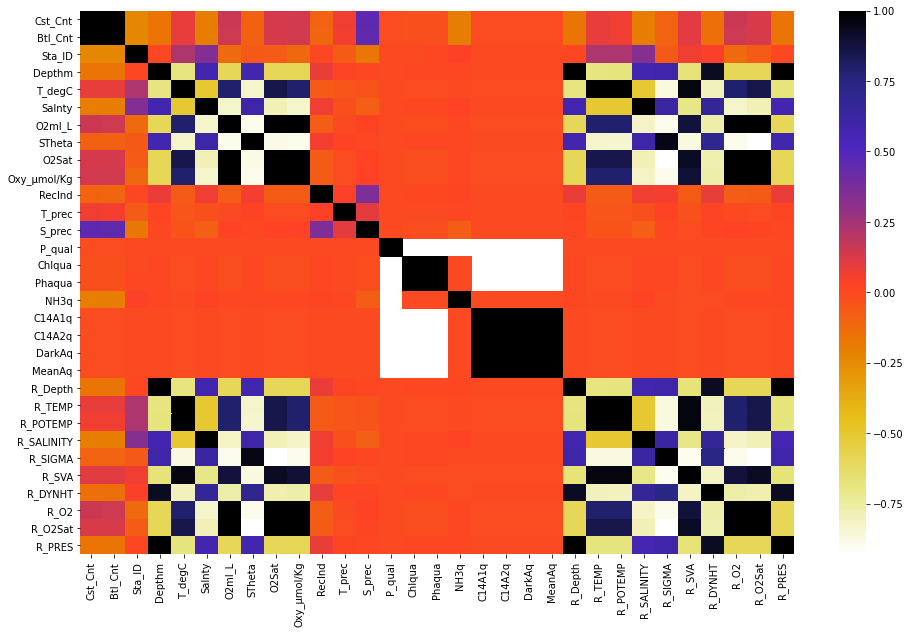

In [21]:
plt.figure(figsize=[16,10])
sns.heatmap(corr,cmap=plt.cm.CMRmap_r)

## Removing the features that are highly correlated

In [22]:
def correlation(dataset,threshold):
    col_corr= set()  #set of all names of correlated columns
    corr_matrix= df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        
                

In [23]:
corr_features=correlation(df,.90)

In [24]:
len(set(corr_features))

17

In [25]:
corr_features

{'Btl_Cnt',
 'C14A2q',
 'DarkAq',
 'MeanAq',
 'O2Sat',
 'Oxy_µmol/Kg',
 'Phaqua',
 'R_DYNHT',
 'R_Depth',
 'R_O2',
 'R_O2Sat',
 'R_POTEMP',
 'R_PRES',
 'R_SALINITY',
 'R_SIGMA',
 'R_SVA',
 'R_TEMP'}

In [26]:
df.drop(corr_features,axis=1,inplace=True)

In [27]:
df

,Cst_Cnt,Sta_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual,Chlqua,NH3q,C14A1q
0,1,312,0,10.500,33.4400,NaN,25.64900,3,1.0,2.0,9.0,9.0,9.0,9.0
1,1,312,8,10.460,33.4400,NaN,25.65600,3,2.0,2.0,9.0,9.0,9.0,9.0
2,1,312,10,10.460,33.4370,NaN,25.65400,7,2.0,3.0,9.0,9.0,9.0,9.0
3,1,312,19,10.450,33.4200,NaN,25.64300,3,2.0,2.0,9.0,9.0,9.0,9.0
4,1,312,20,10.450,33.4210,NaN,25.64300,7,2.0,3.0,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,1386,0,18.744,33.4083,5.805,23.87055,7,2.0,3.0,NaN,NaN,NaN,9.0
864859,34404,1386,2,18.744,33.4083,5.805,23.87072,3,2.0,3.0,NaN,NaN,4.0,9.0
864860,34404,1386,5,18.692,33.4150,5.796,23.88911,3,2.0,3.0,NaN,NaN,4.0,9.0
864861,34404,1386,10,18.161,33.4062,5.816,24.01426,3,2.0,3.0,NaN,NaN,NaN,9.0


### dropping the rows with null values

In [28]:
df2=df.dropna(thresh=14) #dropping all rows with NaN values

In [29]:
df2

,Cst_Cnt,Sta_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual,Chlqua,NH3q,C14A1q
2160,71,162,0,10.30,33.030,5.90,25.364,3,1.0,2.0,9.0,9.0,9.0,9.0
2161,71,162,6,18.46,32.920,6.02,23.568,3,2.0,2.0,9.0,9.0,9.0,9.0
2162,71,162,10,10.29,32.951,6.04,25.304,7,2.0,3.0,9.0,9.0,9.0,9.0
2163,71,162,15,10.29,32.990,6.06,25.335,3,2.0,2.0,9.0,9.0,9.0,9.0
2164,71,162,20,10.33,33.005,6.04,25.339,7,2.0,3.0,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817823,32582,575,250,7.83,34.088,1.51,26.587,7,2.0,3.0,9.0,9.0,9.0,9.0
817825,32582,575,300,7.09,34.115,1.18,26.713,7,2.0,3.0,9.0,9.0,9.0,9.0
817828,32582,575,400,6.50,34.196,0.62,26.858,7,2.0,3.0,9.0,9.0,9.0,9.0
817830,32582,575,500,5.84,34.252,0.40,26.987,7,2.0,3.0,9.0,9.0,9.0,9.0


# Train Test split

In [30]:
x= df2.drop('Salnty',axis=1)
y= df2['Salnty']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=5)


In [31]:
x_train.shape

(289782, 13)

In [32]:
x_test.shape

(96594, 13)

# Feature Scaling

In [35]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing dataabs
x_test = norm.transform(x_test)

x_train
x_test

array([[6.34264590e-01, 6.54006836e-01, 1.12689217e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.97248652e-02, 3.09532852e-01, 1.73051766e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.31252651e-01, 1.86099506e-01, 1.86880957e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.89461245e-01, 6.24762628e-01, 9.34404784e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.54439125e-01, 1.64830991e-01, 2.80321435e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.69656384e-03, 2.23699202e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Training the Models

## 1. Linear Regression

In [254]:
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

regressor_1 = LinearRegression(normalize=True)
regressor_1.fit(x_train,y_train)
y_pred_1 = regressor_1.predict(x_test)


#### r2_score, MAE, MSE, RMSE

In [256]:
r2_score_LR=r2_score(y_test,y_pred_1)
r2_score_LR

0.9508505380654608

In [257]:
MSE_LR=np.mean((regressor_1.predict(x_test) - y_test) ** 2)
MSE_LR

0.010194830565404062

In [258]:
RMSE_LR = math.sqrt(MSE_LR)
RMSE_LR

0.10096945362536168

In [259]:
MAE_LR = mean_absolute_error(y_test, y_pred_1)
MAE_LR

0.06755557585955091

## 2. Random Forest Regression

In [290]:
from sklearn.ensemble import RandomForestRegressor

regressor_2 = RandomForestRegressor( n_estimators = 150, random_state = 50,max_features=13,criterion='mse')
regressor_2.fit(x_train,y_train)
y_pred_2 = regressor_2.predict(x_test)

#### r2_score, MAE, MSE, RMSE

In [291]:
r2_score_RFR=r2_score(y_test,y_pred_2)

r2_score_RFR

0.9984805881915385

In [292]:
MSE_RFR= np.mean((regressor_2.predict(x_test) - y_test) ** 2)
MSE_RFR

0.00031516410020866335

In [293]:
RMSE_RFR = math.sqrt(MSE_RFR)
RMSE_RFR 

0.017752861747015982

In [294]:
MAE_RFR = mean_absolute_error(y_test, y_pred_2)
MAE_RFR

0.006602247896694698

## 3. Decision Tree Regression

In [305]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor_3 = DecisionTreeRegressor(random_state = 100,criterion='mse',max_features=13) 
  
# fit the regressor with X and Y data
regressor_3.fit(x_train,y_train)
y_pred_3 = regressor_3.predict(x_test)

#### r2_score, MAE, MSE, RMSE

In [306]:
r2_score_DTR=r2_score(y_test,y_pred_3)

r2_score_DTR

0.9954064629621727

In [307]:
MSE_DTR= np.mean((regressor_3.predict(x_test) - y_test) ** 2)
MSE_DTR

0.0009528147400459523

In [308]:
RMSE_DTR = math.sqrt(MSE_DTR)
RMSE_DTR

0.030867697355746383

In [309]:
MAE_DTR = mean_absolute_error(y_test, y_pred_3)
MAE_DTR

0.013246257531523706

## 4. Bayesian regression

In [330]:
from sklearn.linear_model import BayesianRidge

regressor_4 = BayesianRidge(n_iter=40,alpha_1=1e-01,
    alpha_2=1e-01,
    lambda_1=1e-01,
    lambda_2=1e-01)
regressor_4.fit(x_train, y_train)

y_pred_4 = regressor_4 .predict(x_test)

#### r2_score, MAE, MSE, RMSE

In [331]:
r2_score_BR=r2_score(y_test,y_pred_4)

r2_score_BR

0.9508505503376731

In [332]:
MSE_BR= np.mean((regressor_4.predict(x_test) - y_test) ** 2)
MSE_BR

0.010194828019839494

In [333]:
RMSE_BR = math.sqrt(MSE_BR)
RMSE_BR

0.10096944101974366

In [334]:
MAE_BR = mean_absolute_error(y_test, y_pred_4)
MAE_BR

0.06755556958280429

## 5. Neural Network Regression

In [234]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [340]:
regressor_5 = Sequential()
regressor_5.add(Dense(20, input_dim=13, activation='relu'))
#regressor_5.add(Dense(5, activation='relu'))
#regressor_5.add(Dense(5, activation='relu'))
regressor_5.add(Dense(1, activation='linear'))

In [341]:
# compile the keras model
regressor_5.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae','mse','mape'])

In [342]:
# fit the keras model on the dataset
history=regressor_5.fit(x_train, y_train ,batch_size = 1000, epochs = 100)
test_loss = regressor_5.evaluate(x_test,y_test)

Epoch 1/100
290/290 [==============================] - 2s 592us/step - loss: 1018.1284 - mae: 31.8051 - mse: 1018.1284 - mape: 93.6154
Epoch 2/100
290/290 [==============================] - 0s 585us/step - loss: 323.9059 - mae: 17.2940 - mse: 323.9059 - mape: 50.9030
Epoch 3/100
290/290 [==============================] - 0s 585us/step - loss: 43.8830 - mae: 5.1447 - mse: 43.8830 - mape: 15.1522
Epoch 4/100
290/290 [==============================] - 0s 585us/step - loss: 25.2167 - mae: 4.2814 - mse: 25.2167 - mape: 12.6112
Epoch 5/100
290/290 [==============================] - 0s 585us/step - loss: 18.1187 - mae: 3.5970 - mse: 18.1187 - mape: 10.5950
Epoch 6/100
290/290 [==============================] - 0s 592us/step - loss: 12.5037 - mae: 2.9359 - mse: 12.5037 - mape: 8.6472
Epoch 7/100
290/290 [==============================] - 0s 585us/step - loss: 8.4352 - mae: 2.3605 - mse: 8.4352 - mape: 6.9512
Epoch 8/100
290/290 [==============================] - 0s 589us/step - loss: 5.3870 - 

#### r2_score, MAE, MSE, RMSE

In [343]:
test_loss

[0.005472843069583178,
 0.04703519865870476,
 0.005472843069583178,
 0.13853444159030914]

# Comparative Study

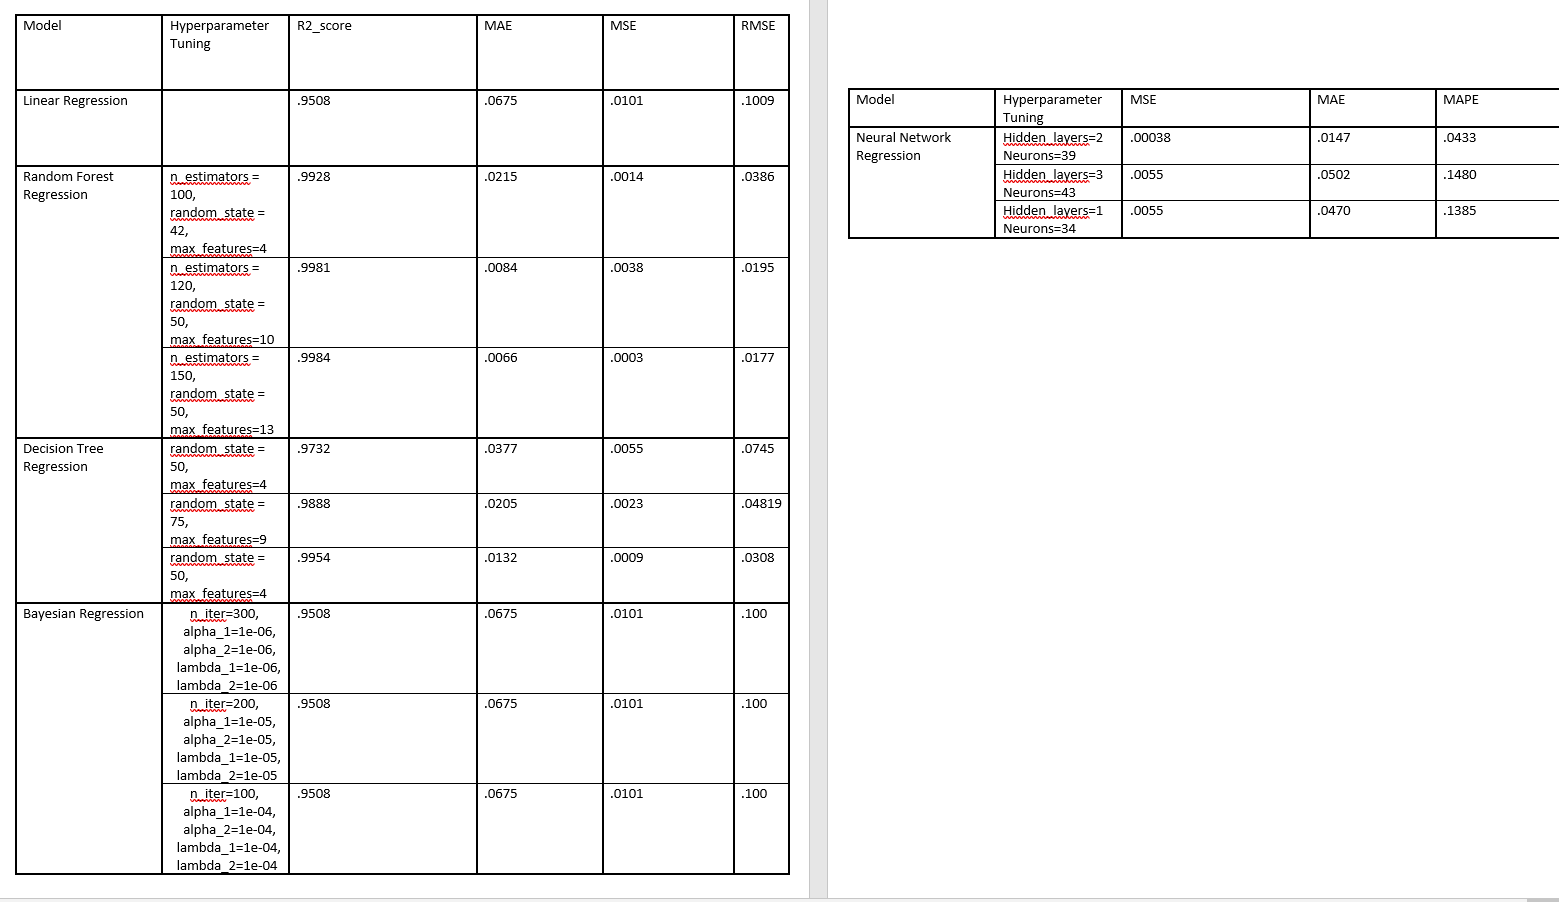

# Observation

from the overall comparison of the models above, we can say that Random forest regression and Neural Network regression gave the result with lesser error than others